Importing Libraries

In [1]:
!pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 991.0 kB/s eta 0:00:02
   - -------------------------------------- 0.0/1.4 MB 991.0 kB/s eta 0:00:02
   - -------------------------------------- 0.0/1.4 MB 991.0 kB/s eta 0:00:02
   - -------------------------------------- 0.0/1.4 MB 991.0 kB/s eta 0:00:02
   - -------------------------------------- 0.0/1.4 MB 991.0 kB/s eta 0:00:02
   - -------------------------------------- 0.1/1.4 MB 204.8 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.4 MB 204.8 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.4 MB 204.8 kB/s eta 0:00:07
   - --------------------------

In [2]:
!pip install openpyxl


In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the dataset

In [41]:
df=pd.read_excel('Online Retail.xlsx')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

In [42]:
df.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [43]:
df.Description=df.Description.str.strip()

In [44]:
df.Description[:5]

0     WHITE HANGING HEART T-LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART.
Name: Description, dtype: object

In [45]:
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

In [46]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [47]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [48]:
df=df.copy()

In [49]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [50]:
df[df['Country']=='France'].head(20)

InvoiceNo StockCode                         Description  Quantity  \
26    536370     22728           ALARM CLOCK BAKELIKE PINK        24   
27    536370     22727            ALARM CLOCK BAKELIKE RED        24   
28    536370     22726          ALARM CLOCK BAKELIKE GREEN        12   
29    536370     21724     PANDA AND BUNNIES STICKER SHEET        12   
30    536370     21883                     STARS GIFT TAPE        24   
31    536370     10002          INFLATABLE POLITICAL GLOBE        48   
32    536370     21791   VINTAGE HEADS AND TAILS CARD GAME        24   
33    536370     21035      SET/2 RED RETROSPOT TEA TOWELS        18   
34    536370     22326  ROUND SNACK BOXES SET OF4 WOODLAND        24   
35    536370     22629                  SPACEBOY LUNCH BOX        24   
36    536370     22659             LUNCH BOX I LOVE LONDON        24   
37    536370     22631             CIRCUS PARADE LUNCH BOX        24   
38    536370     22661     CHARLOTTE BAG DOLLY GIRL DESIGN        20   
39    536370     21731       RED TOADSTOOL LED NIGHT LIGHT        24   
40    536370     22900      SET 2 TEA TOWELS I LOVE LONDON        24   
41    536370     21913      VINTAGE SEASIDE JIGSAW PUZZLES        12   
42    536370     22540           MINI JIGSAW CIRCUS PARADE        24   
43    536370     22544                MINI JIGSAW SPACEBOY        24   
44    536370     22492              MINI PAINT SET VINTAGE        36   
45    536370      POST                             POSTAGE         3   

           InvoiceDate  UnitPrice  CustomerID Country  
26 2010-12-01 08:45:00       3.75     12583.0  France  
27 2010-12-01 08:45:00       3.75     12583.0  France  
28 2010-12-01 08:45:00       3.75     12583.0  France  
29 2010-12-01 08:45:00       0.85     12583.0  France  
30 2010-12-01 08:45:00       0.65     12583.0  France  
31 2010-12-01 08:45:00       0.85     12583.0  France  
32 2010-12-01 08:45:00       1.25     12583.0  France  
33 2010-12-01 08:45:00       2.95     12583.0  France  
34 2010-12-01 08:45:00       2.95     12583.0  France  
35 2010-12-01 08:45:00       1.95     12583.0  France  
36 2010-12-01 08:45:00       1.95     12583.0  France  
37 2010-12-01 08:45:00       1.95     12583.0  France  
38 2010-12-01 08:45:00       0.85     12583.0  France  
39 2010-12-01 08:45:00       1.65     12583.0  France  
40 2010-12-01 08:45:00       2.95     12583.0  France  
41 2010-12-01 08:45:00       3.75     12583.0  France  
42 2010-12-01 08:45:00       0.42     12583.0  France  
43 2010-12-01 08:45:00       0.42     12583.0  France  
44 2010-12-01 08:45:00       0.65     12583.0  France  
45 2010-12-01 08:45:00      18.00     12583.0  France

In [51]:
df = df[~df['InvoiceNo'].str.contains('C')]

In [52]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [53]:
# Grouping data by 'InvoiceNo', 'Description', and 'Country' and summing 'Quantity'
# data1= df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum()
data1=df[df.Country=='France'].groupby(['InvoiceNo', 'Description'])['Quantity'].sum()

In [54]:
data1=data1.unstack().reset_index().fillna('0')

In [55]:
data1.set_index('InvoiceNo').head()

Description 10 COLOUR SPACEBOY PEN 12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                       
536370                           0                          0   
536852                           0                          0   
536974                           0                          0   
537065                           0                          0   
537463                           0                          0   

Description 12 EGG HOUSE PAINTED WOOD 12 MESSAGE CARDS WITH ENVELOPES  \
InvoiceNo                                                               
536370                              0                               0   
536852                              0                               0   
536974                              0                               0   
537065                              0                               0   
537463                              0                               0   

Description 12 PENCIL SMALL TUBE WOODLAND 12 PENCILS SMALL TUBE RED RETROSPOT  \
InvoiceNo                                                                       
536370                                  0                                   0   
536852                                  0                                   0   
536974                                  0                                   0   
537065                                  0                                   0   
537463                                  0                                   0   

Description 12 PENCILS SMALL TUBE SKULL 12 PENCILS TALL TUBE POSY  \
InvoiceNo                                                           
536370                                0                         0   
536852                                0                         0   
536974                                0                         0   
537065                                0                         0   
537463                                0                         0   

Description 12 PENCILS TALL TUBE RED RETROSPOT 12 PENCILS TALL TUBE WOODLAND  \
InvoiceNo                                                                      
536370                                       0                             0   
536852                                       0                             0   
536974                                       0                             0   
537065                                       0                             0   
537463                                       0                             0   

Description  ... WRAP VINTAGE PETALS  DESIGN YELLOW COAT RACK PARIS FASHION  \
InvoiceNo    ...                                                              
536370       ...                           0                              0   
536852       ...                           0                              0   
536974       ...                           0                              0   
537065       ...                           0                              0   
537463       ...                           0                              0   

Description YELLOW GIANT GARDEN THERMOMETER YELLOW SHARK HELICOPTER  \
InvoiceNo                                                             
536370                                    0                       0   
536852                                    0                       0   
536974                                    0                       0   
537065                                    0                       0   
537463                                    0                       0   

Description ZINC  STAR T-LIGHT HOLDER ZINC FOLKART SLEIGH BELLS  \
InvoiceNo                                                         
536370                              0                         0   
536852                              0                         0   
536974                              0                         0   
537065                          

In [56]:
data1.columns=data1.columns.str.replace(' ','_')

In [57]:
import pandas as pd


# Convert 'InvoiceNo' to string and filter out non-numeric entries
data1['InvoiceNo'] = data1['InvoiceNo'].astype(str)
mask = data1['InvoiceNo'].apply(lambda x: not x.isdigit())

# Display non-numeric Invoice Numbers for review
print("Non-numeric Invoice Numbers:", data1.loc[mask, 'InvoiceNo'].unique())

# Drop non-numeric 'InvoiceNo' rows
data1 = data1[~mask]

# Reset index if necessary
data1.reset_index(drop=True, inplace=True)

# Display resulting DataFrame
data1


Non-numeric Invoice Numbers: []


Description InvoiceNo 10_COLOUR_SPACEBOY_PEN 12_COLOURED_PARTY_BALLOONS  \
0              536370                      0                          0   
1              536852                      0                          0   
2              536974                      0                          0   
3              537065                      0                          0   
4              537463                      0                          0   
..                ...                    ...                        ...   
387            580986                      0                          0   
388            581001                      0                          0   
389            581171                      0                          0   
390            581279                      0                          0   
391            581587                      0                          0   

Description 12_EGG_HOUSE_PAINTED_WOOD 12_MESSAGE_CARDS_WITH_ENVELOPES  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   
..                                ...                             ...   
387                                 0                               0   
388                                 0                               0   
389                                 0                               0   
390                                 0                               0   
391                                 0                               0   

Description 12_PENCIL_SMALL_TUBE_WOODLAND 12_PENCILS_SMALL_TUBE_RED_RETROSPOT  \
0                                       0                                   0   
1                                       0                                   0   
2                                       0                                   0   
3                                       0                                   0   
4                                       0                                   0   
..                                    ...                                 ...   
387                                     0                                   0   
388                                     0                                   0   
389                                     0                                   0   
390                                     0                                   0   
391                                     0                                   0   

Description 12_PENCILS_SMALL_TUBE_SKULL 12_PENCILS_TALL_TUBE_POSY  \
0                                     0                         0   
1                                     0                         0   
2                                     0                         0   
3                                     0                         0   
4                                     0                         0   
..                                  ...                       ...   
387                                   0                         0   
388                                   0                         0   
389                                   0                         0   
390                                   0                         0   
391                                   0                         0   

Description 12_PENCILS_TALL_TUBE_RED_RETROSPOT  ...  \
0                                            0  ...   
1                                            0  ...   
2                                            0  ...   
3                                            0  ...   
4                                            0  ...   
..                                         ...  ...   
387                                

In [58]:
for col in data1.columns:
    try:
        data1[col] = data1[col].astype(int)
    except ValueError as e:
        print(f"Column '{col}' cannot be converted to int: {e}")


In [59]:
def onehot(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
dataset=data1.applymap(onehot)

C:\Users\dodo\AppData\Local\Temp\ipykernel_7456\1834826494.py:6: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [60]:
dataset=dataset.set_index('InvoiceNo')

In [61]:
frequent_itemsets= apriori(dataset, min_support=0.1, use_colnames=True)

E:\anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [62]:
frequent_itemsets.head()

support                     itemsets
0  0.102041  (ALARM_CLOCK_BAKELIKE_PINK)
1  0.125000     (LUNCH_BAG_APPLE_DESIGN)
2  0.153061    (LUNCH_BAG_RED_RETROSPOT)
3  0.119898  (LUNCH_BAG_SPACEBOY_DESIGN)
4  0.117347         (LUNCH_BAG_WOODLAND)

In [63]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rules.sort_values('lift',ascending=False)

antecedents  \
8              (SET/6_RED_SPOTTY_PAPER_CUPS)   
9            (SET/6_RED_SPOTTY_PAPER_PLATES)   
11  (POSTAGE, SET/6_RED_SPOTTY_PAPER_PLATES)   
12             (SET/6_RED_SPOTTY_PAPER_CUPS)   
10    (SET/6_RED_SPOTTY_PAPER_CUPS, POSTAGE)   
13           (SET/6_RED_SPOTTY_PAPER_PLATES)   
6            (SET/6_RED_SPOTTY_PAPER_PLATES)   
7       (SET/20_RED_RETROSPOT_PAPER_NAPKINS)   
4              (SET/6_RED_SPOTTY_PAPER_CUPS)   
5       (SET/20_RED_RETROSPOT_PAPER_NAPKINS)   
2         (PLASTERS_IN_TIN_WOODLAND_ANIMALS)   
3                 (PLASTERS_IN_TIN_SPACEBOY)   
0         (PLASTERS_IN_TIN_WOODLAND_ANIMALS)   
1            (PLASTERS_IN_TIN_CIRCUS_PARADE)   

                                 consequents  antecedent support  \
8            (SET/6_RED_SPOTTY_PAPER_PLATES)            0.137755   
9              (SET/6_RED_SPOTTY_PAPER_CUPS)            0.127551   
11             (SET/6_RED_SPOTTY_PAPER_CUPS)            0.107143   
12  (POSTAGE, SET/6_RED_SPOTTY_PAPER_PLATES)            0.137755   
10           (SET/6_RED_SPOTTY_PAPER_PLATES)            0.117347   
13    (SET/6_RED_SPOTTY_PAPER_CUPS, POSTAGE)            0.127551   
6       (SET/20_RED_RETROSPOT_PAPER_NAPKINS)            0.127551   
7            (SET/6_RED_SPOTTY_PAPER_PLATES)            0.132653   
4       (SET/20_RED_RETROSPOT_PAPER_NAPKINS)            0.137755   
5              (SET/6_RED_SPOTTY_PAPER_CUPS)            0.132653   
2                 (PLASTERS_IN_TIN_SPACEBOY)            0.170918   
3         (PLASTERS_IN_TIN_WOODLAND_ANIMALS)            0.137755   
0            (PLASTERS_IN_TIN_CIRCUS_PARADE)            0.170918   
1         (PLASTERS_IN_TIN_WOODLAND_ANIMALS)            0.168367   

    consequent support   support  confidence      lift  leverage  conviction  \
8             0.127551  0.122449    0.888889  6.968889  0.104878    7.852041   
9             0.137755  0.122449    0.960000  6.968889  0.104878   21.556122   
11            0.137755  0.102041    0.952381  6.913580  0.087281   18.107143   
12            0.107143  0.102041    0.740741  6.913580  0.087281    3.443878   
10            0.127551  0.102041    0.869565  6.817391  0.087073    6.688776   
13            0.117347  0.102041    0.800000  6.817391  0.087073    4.413265   
6             0.132653  0.102041    0.800000  6.030769  0.085121    4.336735   
7             0.127551  0.102041    0.769231  6.030769  0.085121    3.780612   
4             0.132653  0.102041    0.740741  5.584046  0.083767    3.345481   
5             0.137755  0.102041    0.769231  5.584046  0.083767    3.736395   
2             0.137755  0.104592    0.611940  4.442233  0.081047    2.221939   
3             0.170918  0.104592    0.759259  4.442233  0.081047    3.443878   
0             0.168367  0.102041    0.597015  3.545907  0.073264    2.063681   
1             0.170918  0.102041    0.606061  3.545907  0.073264    2.104592   

    zhangs_metric  
8        0.993343  
9        0.981725  
11       0.958000  
12       0.992012  
10       0.966763  
13       0.978070  
6        0.956140  
7        0.961765  
4        0.952071  
5        0.946471  
2        0.934634  
3        0.898687  
0        0.866000  
1        0.863344

In [64]:
print(frequent_itemsets)

     support                                           itemsets
0   0.102041                        (ALARM_CLOCK_BAKELIKE_PINK)
1   0.125000                           (LUNCH_BAG_APPLE_DESIGN)
2   0.153061                          (LUNCH_BAG_RED_RETROSPOT)
3   0.119898                        (LUNCH_BAG_SPACEBOY_DESIGN)
4   0.117347                               (LUNCH_BAG_WOODLAND)
5   0.142857                 (LUNCH_BOX_WITH_CUTLERY_RETROSPOT)
6   0.104592                           (MINI_PAINT_SET_VINTAGE)
7   0.102041                  (PACK_OF_72_RETROSPOT_CAKE_CASES)
8   0.168367                    (PLASTERS_IN_TIN_CIRCUS_PARADE)
9   0.137755                         (PLASTERS_IN_TIN_SPACEBOY)
10  0.170918                 (PLASTERS_IN_TIN_WOODLAND_ANIMALS)
11  0.765306                                          (POSTAGE)
12  0.188776                               (RABBIT_NIGHT_LIGHT)
13  0.137755                         (RED_RETROSPOT_MINI_CASES)
14  0.181122                    (RED_TOA

In [65]:

def recommend_products(input_product):
    # Filter rules where the input product is an antecedent
    relevant_rules = rules[rules['antecedents'].apply(lambda x: input_product in x)]
    
    # If there are relevant rules, proceed to recommend
    if not relevant_rules.empty:
        # Sort rules by confidence or lift
        recommendations = relevant_rules.sort_values(by='confidence', ascending=False)
        
        # Display recommendations
        print("Based on your interest in", input_product, "you might also like:")
        for index, row in recommendations.iterrows():
            print(list(row['consequents']), "with confidence of", row['confidence'])
    else:
        print("No recommendations available for", input_product)

# Example usage
# User interface in the command-line
user_input = input("Enter a product to get recommendations: ")
recommend_products(user_input)

Enter a product to get recommendations: PLASTERS_IN_TIN_SPACEBOY
Based on your interest in PLASTERS_IN_TIN_SPACEBOY you might also like:
['PLASTERS_IN_TIN_WOODLAND_ANIMALS'] with confidence of 0.7592592592592594


# Customer Segmentation 

In [3]:
df=pd.read_excel('Online Retail.xlsx')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

In [4]:
missing_values = pd.DataFrame({'Feature': df.columns,
                              'No. of Missing Values': df.isnull().sum().values,
                              '% of Missing Values': ((df.isnull().sum().values)/len(df)*100)})

unique_values = pd.DataFrame({'Feature': df.columns,
                              'No. of Unique Values': df.nunique().values})

feature_types = pd.DataFrame({'Feature': df.columns,
                              'DataType': df.dtypes})

merged_df = pd.merge(missing_values, unique_values, on='Feature', how='left')
merged_df = pd.merge(merged_df, feature_types, on='Feature', how='left')

merged_df

Feature  No. of Missing Values  % of Missing Values  \
0    InvoiceNo                      0             0.000000   
1    StockCode                      0             0.000000   
2  Description                   1454             0.268311   
3     Quantity                      0             0.000000   
4  InvoiceDate                      0             0.000000   
5    UnitPrice                      0             0.000000   
6   CustomerID                 135080            24.926694   
7      Country                      0             0.000000   

   No. of Unique Values        DataType  
0                 25900          object  
1                  4070          object  
2                  4223          object  
3                   722           int64  
4                 23260  datetime64[ns]  
5                  1630         float64  
6                  4372         float64  
7                    38          object

In [5]:
df.dropna(subset=['CustomerID'], inplace=True) 


In [6]:
print("Number of datapoints:", len(df)) # Length of data after dropping values

Number of datapoints: 406829


In [7]:
df[df['Quantity'] <= 0]


InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[8905 rows x 8 columns]

In [8]:
unique_stockcode_count = df[df['Quantity'] <= 0]['StockCode'].value_counts()

top_5_stockcode = unique_stockcode_count.head(5).index.tolist()

print("Top 5 Most Used Stock Codes:")
print(top_5_stockcode)

Top 5 Most Used Stock Codes:
[22423, 'M', 'POST', 22960, 'D']


In [9]:
filtered_stock_descriptions = df[df['StockCode'].isin(top_5_stockcode)][['StockCode', 'Description']].drop_duplicates(subset='StockCode')
print(filtered_stock_descriptions)

     StockCode               Description
21       22960  JAM MAKING SET WITH JARS
45        POST                   POSTAGE
141          D                  Discount
880      22423  REGENCY CAKESTAND 3 TIER
2239         M                    Manual


In [10]:
# Define stock codes to exclude
exclude_stock_codes = ['POST', 'D', 'M']

# Filter out rows with excluded stock codes
df = df[~df['StockCode'].isin(exclude_stock_codes)].copy()

# Create a new binary column 'IsReturn'
df['IsReturn'] = 0

# Mark rows with negative quantities as returns
df.loc[df['Quantity'] < 0, 'IsReturn'] = 1

In [11]:
df[df['UnitPrice'] <= 0]


InvoiceNo StockCode                          Description  Quantity  \
9302      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
33576     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090              PAPER BUNTING RETROSPOT        24   
47070     540372     22553               PLASTERS IN TIN SKULLS        24   
56674     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
86789     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188    547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453    548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208    548871     22162          HEART GARLAND RUSTIC PADDED         2   
157042    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613    553000     47566                        PARTY BUNTING         4   
198383    554037     22619            SET OF 6 SOLDIER SKITTLES        80   
279324    561284     22167           OVAL WALL MIRROR DIAMANTE          1   
282912    561669     22960             JAM MAKING SET WITH JARS        11   
298054    562973     23157           SET OF 6 NATIVITY MAGNETS        240   
314745    564651     23270     SET OF 2 CERAMIC PAINTED HEARTS         96   
314746    564651     23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   
314747    564651     22955             36 FOIL STAR CAKE CASES        144   
314748    564651     21786                   POLKADOT RAIN HAT        144   
358655    568158      PADS           PADS TO MATCH ALL CUSHIONS         1   
379913    569716     22778                   GLASS CLOCHE SMALL         2   
420404    572893     21208          PASTEL COLOUR HONEYCOMB FAN         5   
436428    574138     23234        BISCUIT TIN VINTAGE CHRISTMAS       216   
436597    574175     22065       CHRISTMAS PUDDING TRINKET POT         12   
439361    574469     22385            JUMBO BAG SPACEBOY DESIGN        12   
446125    574879     22625                   RED KITCHEN SCALES         2   
446793    574920     22899         CHILDREN'S APRON DOLLY GIRL          1   
446794    574920     23480       MINI LIGHTS WOODLAND MUSHROOMS         1   
454463    575579     22437        SET OF 9 BLACK SKULL BALLOONS        20   
454464    575579     22089        PAPER BUNTING VINTAGE PAISLEY        24   
479079    577129     22464          HANGING METAL HEART LANTERN         4   
480649    577314     23407       SET OF 2 TRAYS HOME SWEET HOME         2   
502122    578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   

               InvoiceDate  UnitPrice  CustomerID         Country  IsReturn  
9302   2010-12-05 14:02:00        0.0     12647.0         Germany         0  
33576  2010-12-16 14:36:00        0.0     16560.0  United Kingdom         0  
40089  2010-12-21 13:45:00        0.0     14911.0            EIRE         0  
47068  2011-01-06 16:41:00        0.0     13081.0  United Kingdom         0  
47070  2011-01-06 16:41:00        0.0     13081.0  United Kingdom         0  
56674  2011-01-13 15:10:00        0.0     15107.0  United Kingdom         0  
86789  2011-02-10 13:08:00        0.0     17560.0  United Kingdom         0  
130188 2011-03-23 10:25:00        0.0     13239.0  United Kingdom         0  
139453 2011-03-30 12:45:00        0.0     13113.0  United Kingdom         0  
145208 2011-04-04 14:42:00        0.0     14410.0  United Kingdom         0  
157042 2011-04-14 18:57:00        0.0     12457.0     Switzerland         0  
187613 2011-05-12 15:21:00        0.0     17667.0  United Kingdom         0  
198383 2011-05-20 14:13:00        0.0     12415.0       Australia         0  
279324 2011-07-26 12:24:00        0.0     16818.0  United Kingdom         0  
282912 2011-07-28 17:09:00        0.0     12507.0           Spain         0  
298054 2011-08-11 11:42:00        0.0     14911.0            EI

In [12]:
df = df[df['UnitPrice'] > 0]


In [13]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice'] # Calculating the total amount by multiplying quantity by price
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  IsReturn  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom         0   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         0   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom         0   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         0   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         0   

   TotalAmount  
0        15.30  
1        20.34  
2        22.00  
3        20.34  
4        20.34

In [14]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice'] # Calculating the total amount by multiplying quantity by price
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  IsReturn  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom         0   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         0   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom         0   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         0   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         0   

   TotalAmount  
0        15.30  
1        20.34  
2        22.00  
3        20.34  
4        20.34

In [15]:
# Finding the Latest Date 
current_date = max(df[df['IsReturn'] == 0]['InvoiceDate'])
current_date

# Calculating a New Attribute: Days_Since_Last_Purchase
customer_data = df[df['IsReturn'] == 0].groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency (excluding returns)
}).reset_index()

customer_data = customer_data.rename(columns={'InvoiceDate': 'Days_Since_Last_Purchase'})
customer_data.head()

CustomerID  Days_Since_Last_Purchase
0     12346.0                       325
1     12347.0                         1
2     12348.0                        74
3     12349.0                        18
4     12350.0                       309

In [16]:
customer_data['Frequency'] = df[df['IsReturn'] == 0].groupby('CustomerID')['InvoiceNo'].nunique().values
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Frequency
0     12346.0                       325          1
1     12347.0                         1          7
2     12348.0                        74          4
3     12349.0                        18          1
4     12350.0                       309          1

In [17]:
customer_data['Monetary_Value'] = df[df['IsReturn'] == 0].groupby('CustomerID')['TotalAmount'].sum().values
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Frequency  Monetary_Value
0     12346.0                       325          1        77183.60
1     12347.0                         1          7         4310.00
2     12348.0                        74          4         1437.24
3     12349.0                        18          1         1457.55
4     12350.0                       309          1          294.40

In [18]:
basket_size = df[df['Quantity'] > 0].groupby(['CustomerID', 'InvoiceNo'])['Quantity'].mean().reset_index()
basket_size_grouped = basket_size.groupby('CustomerID')['Quantity'].mean().reset_index()
basket_size_grouped = basket_size_grouped.rename(columns={'Quantity': 'Basket_Size'})
customer_data = customer_data.merge(basket_size_grouped, on='CustomerID', how='inner')
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Frequency  Monetary_Value  \
0     12346.0                       325          1        77183.60   
1     12347.0                         1          7         4310.00   
2     12348.0                        74          4         1437.24   
3     12349.0                        18          1         1457.55   
4     12350.0                       309          1          294.40   

    Basket_Size  
0  74215.000000  
1     13.799245  
2     93.250000  
3      8.750000  
4     12.250000

In [19]:
customer_data = customer_data.merge(df.groupby('CustomerID')['IsReturn'].sum().reset_index(), on='CustomerID', how='left')
customer_data = customer_data.rename(columns={'IsReturn': 'No_of_Returns'})
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Frequency  Monetary_Value  \
0     12346.0                       325          1        77183.60   
1     12347.0                         1          7         4310.00   
2     12348.0                        74          4         1437.24   
3     12349.0                        18          1         1457.55   
4     12350.0                       309          1          294.40   

    Basket_Size  No_of_Returns  
0  74215.000000              1  
1     13.799245              0  
2     93.250000              0  
3      8.750000              0  
4     12.250000              0

In [20]:
# Adding countries to customer table
customer_data = customer_data.merge(df[['CustomerID','Country']].drop_duplicates(), on='CustomerID', how='left')
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Frequency  Monetary_Value  \
0     12346.0                       325          1        77183.60   
1     12347.0                         1          7         4310.00   
2     12348.0                        74          4         1437.24   
3     12349.0                        18          1         1457.55   
4     12350.0                       309          1          294.40   

    Basket_Size  No_of_Returns         Country  
0  74215.000000              1  United Kingdom  
1     13.799245              0         Iceland  
2     93.250000              0         Finland  
3      8.750000              0           Italy  
4     12.250000              0          Norway

In [21]:
# Dropping customer ID as we grouped the data using it but its not of any use going further for clustering
customer_data = customer_data.drop(['CustomerID'], axis=1)
customer_data.head()

Days_Since_Last_Purchase  Frequency  Monetary_Value   Basket_Size  \
0                       325          1        77183.60  74215.000000   
1                         1          7         4310.00     13.799245   
2                        74          4         1437.24     93.250000   
3                        18          1         1457.55      8.750000   
4                       309          1          294.40     12.250000   

   No_of_Returns         Country  
0              1  United Kingdom  
1              0         Iceland  
2              0         Finland  
3              0           Italy  
4              0          Norway

# EDA

In [22]:
numerical_cols = ['Days_Since_Last_Purchase','Frequency','Monetary_Value','Basket_Size','No_of_Returns']

fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(12, 12), sharey=True)

for i, col in enumerate(numerical_cols):
  axes[i].boxplot(customer_data[col], vert=False)
  axes[i].set_title(f'Box Plot for {col}')
  axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [23]:
def bounds(data,attribute):
    Q1 = data[attribute].quantile(0.15)
    Q3 = data[attribute].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return(upper_bound,lower_bound)

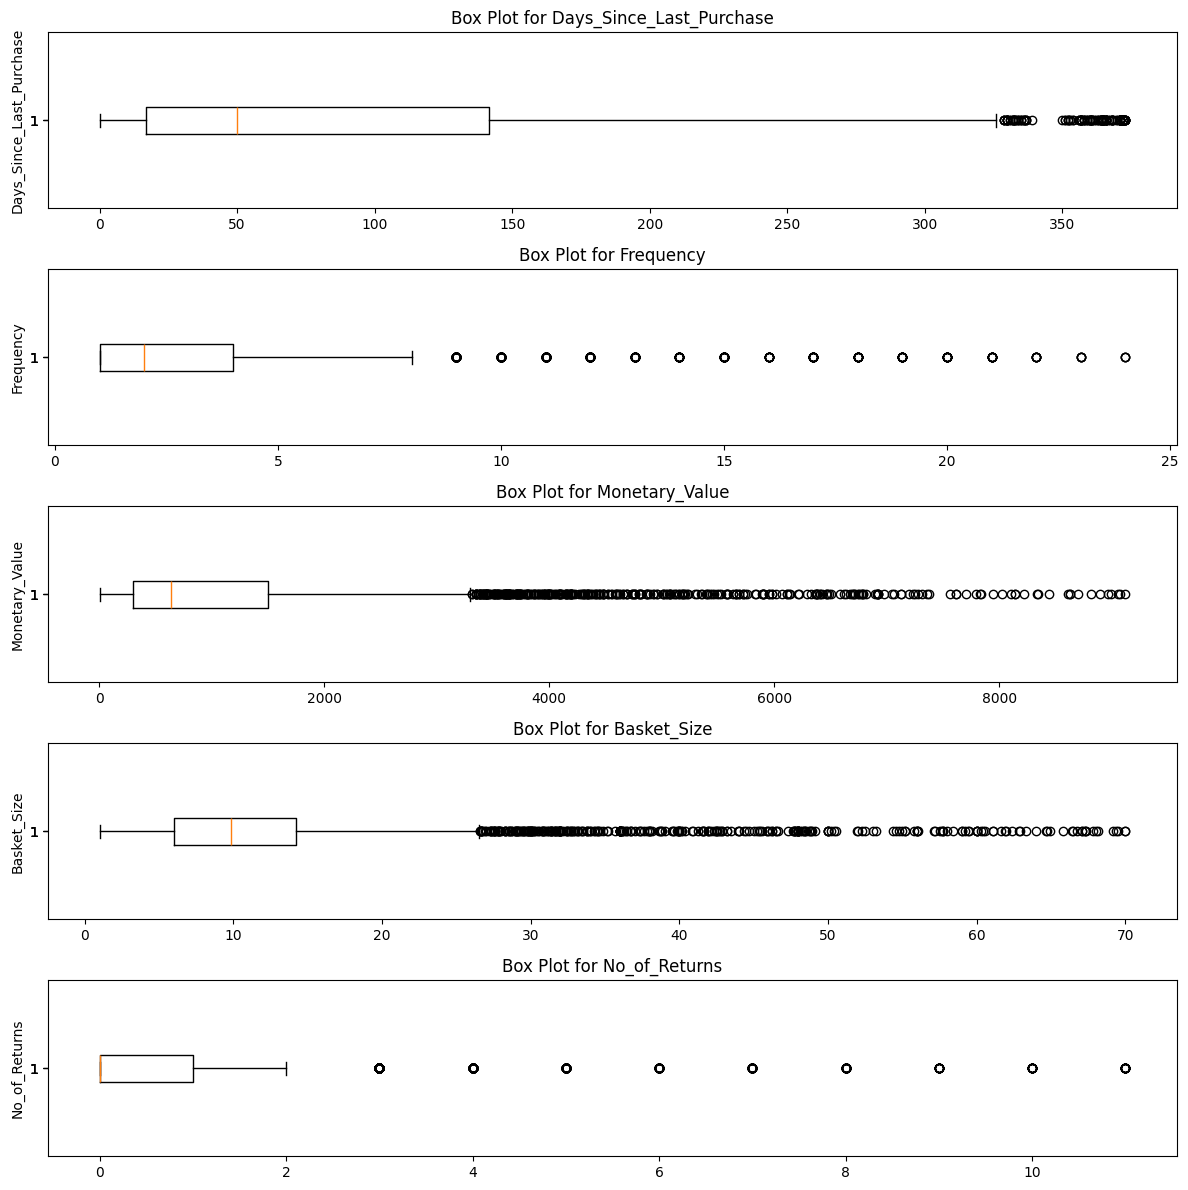

In [24]:
# Removing outliers and plotting the boxplot after removing outliers

numerical_cols = ['Days_Since_Last_Purchase','Frequency','Monetary_Value','Basket_Size','No_of_Returns']

fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(12, 12), sharey=True)

for i, col in enumerate(numerical_cols):
  upper_bound,lower_bound = bounds(customer_data,col)
  customer_data = customer_data[customer_data[col]<upper_bound]
  axes[i].boxplot(customer_data[col], vert=False)
  axes[i].set_title(f'Box Plot for {col}')
  axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


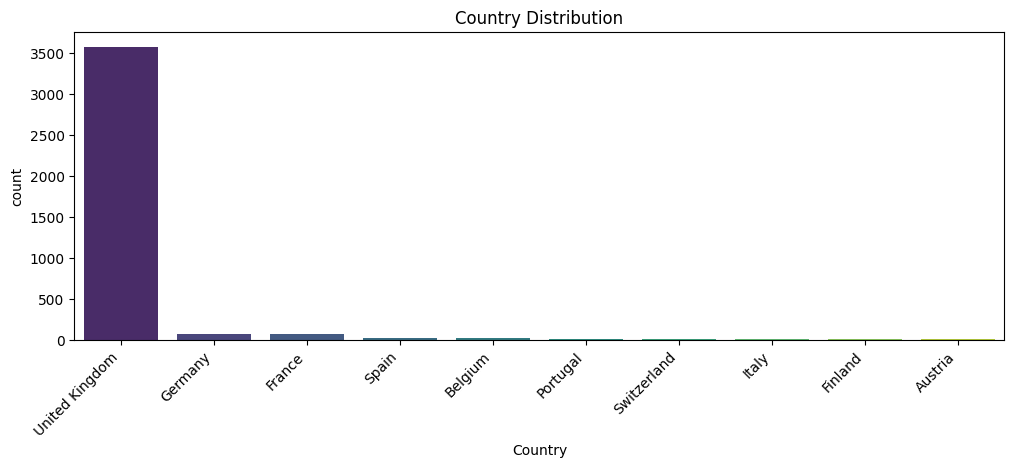

In [25]:
categorical_variable = 'Country'

# Get the top 10 categories
top_countries = customer_data[categorical_variable].value_counts().nlargest(10).index

# Subset the data for the top countries
subset_data = customer_data[customer_data[categorical_variable].isin(top_countries)]

# Set up the plot
plt.figure(figsize=(12, 4))
sns.countplot(x=categorical_variable, data=subset_data, palette='viridis', order=top_countries)
plt.title(f"{categorical_variable} Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()

E:\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


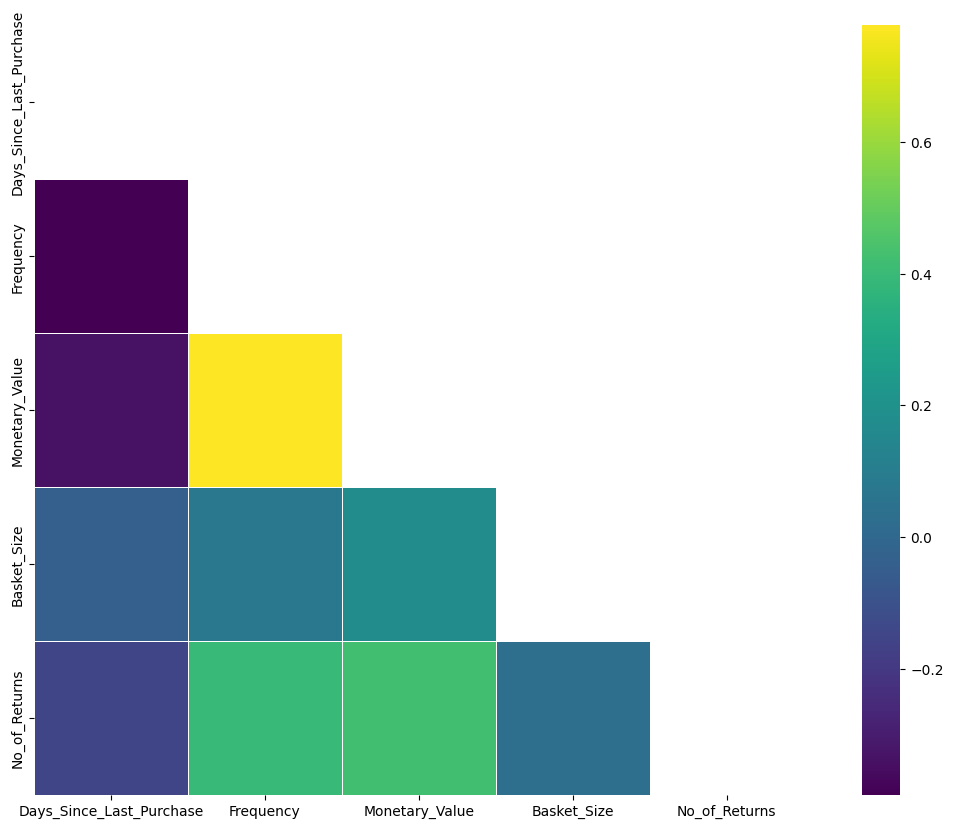

In [26]:
corr = customer_data[['Days_Since_Last_Purchase','Frequency','Monetary_Value','Basket_Size','No_of_Returns']].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(corr, mask=mask, cmap='viridis', annot=True,
                 square=True, linewidths=.5, xticklabels=1, yticklabels=1)

# Clustering

In [27]:
# Get the top 10 categories
top_countries = customer_data['Country'].value_counts().nlargest(10).index

# Subset the data for the top countries
customer_data[customer_data[categorical_variable].isin(top_countries)]['Country'].value_counts()

Country
United Kingdom    3579
France              80
Germany             80
Spain               27
Belgium             25
Portugal            19
Switzerland         19
Italy               13
Finland             11
Austria             10
Name: count, dtype: int64

In [28]:
top_countries = customer_data['Country'].value_counts().nlargest(5).index

customer_data = customer_data[customer_data[categorical_variable].isin(top_countries)]

In [29]:
encoded_customer_data = pd.get_dummies(customer_data, columns=['Country'], prefix='Country')

encoded_customer_data.head()

Days_Since_Last_Purchase  Frequency  Monetary_Value  Basket_Size  \
7                        231          1         1079.40     9.137931   
14                       286          1          174.90    10.000000   
15                         2         10         4737.23     9.017785   
17                         7          4         1208.10    57.165793   
29                        81          2          777.24    10.578947   

    No_of_Returns  Country_Belgium  Country_France  Country_Germany  \
7               0            False           False            False   
14              0             True           False            False   
15              8             True           False            False   
17              0             True           False            False   
29              1             True           False            False   

    Country_Spain  Country_United Kingdom  
7            True                   False  
14          False                   False  
15          False                   False  
17          False                   False  
29          False                   False

In [30]:
encoded_customer_data.dtypes

Days_Since_Last_Purchase      int64
Frequency                     int64
Monetary_Value              float64
Basket_Size                 float64
No_of_Returns                 int64
Country_Belgium                bool
Country_France                 bool
Country_Germany                bool
Country_Spain                  bool
Country_United Kingdom         bool
dtype: object

In [31]:
# Scaling the features
from sklearn.preprocessing import StandardScaler

# Instantiate
scaler = StandardScaler()

numerical_columns = encoded_customer_data.select_dtypes(include=['float64', 'int64']).columns
dummy_columns = encoded_customer_data.select_dtypes(include=['bool']).columns

# fit_transform
encoded_customer_data[numerical_columns] = scaler.fit_transform(encoded_customer_data[numerical_columns])
customer_data_scaled = pd.concat([encoded_customer_data[numerical_columns], encoded_customer_data[dummy_columns]], axis=1)

customer_data_scaled.head()

Days_Since_Last_Purchase  Frequency  Monetary_Value  Basket_Size  \
7                   1.365878  -0.718856        0.001520    -0.286110   
14                  1.913751  -0.718856       -0.707110    -0.204067   
15                 -0.915264   2.067947        2.867244    -0.297544   
17                 -0.865458   0.210078        0.102350     4.284677   
29                 -0.128320  -0.409212       -0.235207    -0.148969   

    No_of_Returns  Country_Belgium  Country_France  Country_Germany  \
7       -0.488268            False           False            False   
14      -0.488268             True           False            False   
15       3.667833             True           False            False   
17      -0.488268             True           False            False   
29       0.031245             True           False            False   

    Country_Spain  Country_United Kingdom  
7            True                   False  
14          False                   False  
15          False                   False  
17          False                   False  
29          False                   False

In [32]:
from sklearn.decomposition import PCA

num_components = 3

# Initialize PCA with the desired number of components
pca = PCA(n_components=num_components)

# Fit and transform the scaled data
principal_components = pca.fit_transform(customer_data_scaled)

# Create a DataFrame with the principal components
columns = [f'PC{i}' for i in range(1, num_components + 1)]
customer_data_pca = pd.DataFrame(data=principal_components, columns=columns)

customer_data_pca.head()

PC1       PC2       PC3
0 -1.147923 -0.009670  0.786816
1 -1.753614  0.105200  1.161401
2  4.685279 -1.007089  1.739212
3  0.850973  4.182684 -0.902664
4 -0.327116 -0.133484 -0.084091

E:\anaconda\Lib\site-packages\yellowbrick\style\colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
E:\anaconda\Lib\site-packages\setuptools\_distutils\version.py:337: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
E:\anaconda\Lib\site-packages\yellowbrick\style\rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
E:\anaconda\Lib\site-packages\setuptools\_distutils\version.py:337: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


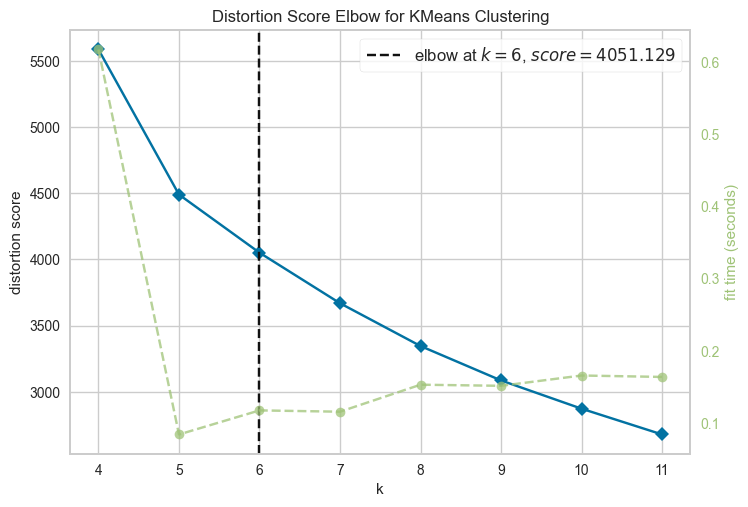

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
from yellowbrick.cluster import KElbowVisualizer

# # Using the elbow method to determine the number of clusters to be formed
# Elbow_M = KElbowVisualizer(KMeans(n_init=10), k=10)
# Elbow_M.fit(customer_data_pca)
# Elbow_M.show()

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import numpy as np

# Generate some synthetic data
# X = np.random.rand(100, 3)

# Instantiate the clustering model and visualizer
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(4,12))

# Fit the data to the visualizer
visualizer.fit(customer_data_pca)
visualizer.show()


In [34]:
# Using agglomertive clustering for forming clusters, and using 5 as n_clusters as determined by the abve elbow method

from sklearn.cluster import AgglomerativeClustering

AC = AgglomerativeClustering(n_clusters=6)
# fit model and predict clusters
yhat_AC = AC.fit_predict(customer_data_pca)
customer_data_pca["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
customer_data["Clusters"]= yhat_AC

# Interpreting Results

In [35]:
import plotly.express as px
import pandas as pd

# Create a 3D scatter plot with colored clusters
fig = px.scatter_3d(customer_data_pca, x='PC1', y='PC2', z='PC3', color='Clusters', 
                    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                    title='3D Scatter Plot of Clusters')

# Show the plot
fig.show()

E:\anaconda\Lib\site-packages\plotly\express\imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


E:\anaconda\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

E:\anaconda\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



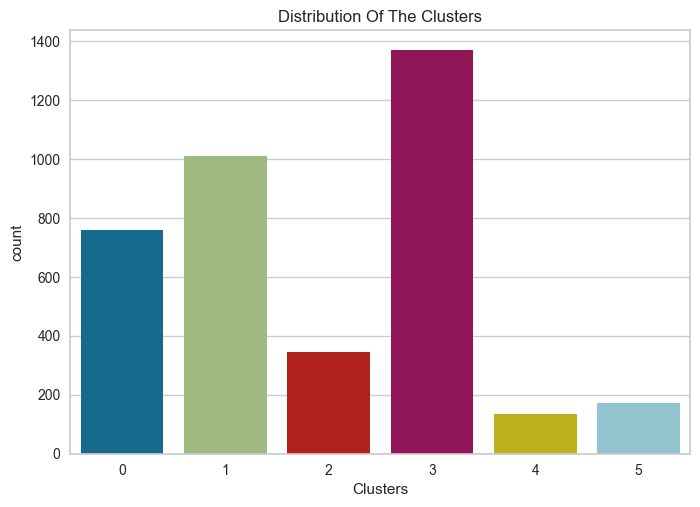

In [36]:
# Plotting a countplot for number of clusters

pl = sns.countplot(x=customer_data["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

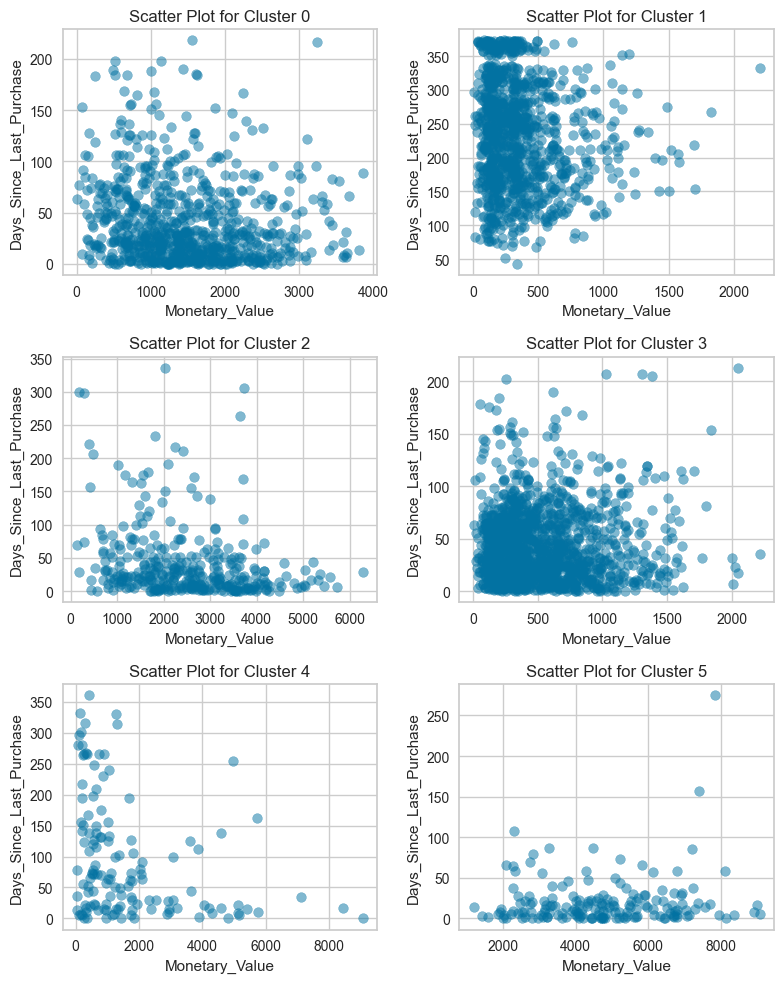

In [37]:
# Plotting a scatter plot for Monetary_Value vs Days_Since_Last_Purchase for each cluster

import numpy as np
import matplotlib.pyplot as plt

num_clusters = len(set(customer_data['Clusters']))

num_rows = 3
num_columns = 2

fig, axs = plt.subplots(num_rows, num_columns, figsize=(8, 10))

axs = axs.ravel()

for cluster_num in range(num_clusters):
    cluster_data = customer_data[customer_data['Clusters'] == cluster_num]

    # Select numeric columns for jittering
    numeric_cols = cluster_data.select_dtypes(include=[np.number])

    # Apply jittering to the numeric columns
    jittered_data = numeric_cols + np.random.normal(0, 0.02, numeric_cols.shape)

    ax = axs[cluster_num]
    ax.scatter(jittered_data['Monetary_Value'], jittered_data['Days_Since_Last_Purchase'], alpha=0.5)
    ax.set_title(f'Scatter Plot for Cluster {cluster_num}')
    ax.set_xlabel('Monetary_Value')
    ax.set_ylabel('Days_Since_Last_Purchase')

for i in range(num_clusters, num_rows * num_columns):
    fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



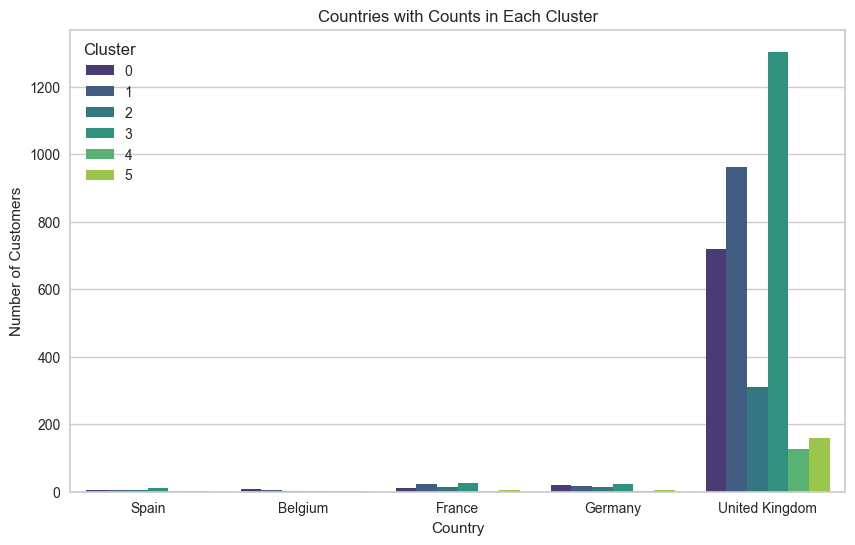

In [38]:
# Plotting the frequency of the top 5 countries as there a lot of countries

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, x="Country", hue="Clusters", palette='viridis')
plt.title(f"Countries with Counts in Each Cluster")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.legend(title="Cluster")
plt.show()

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



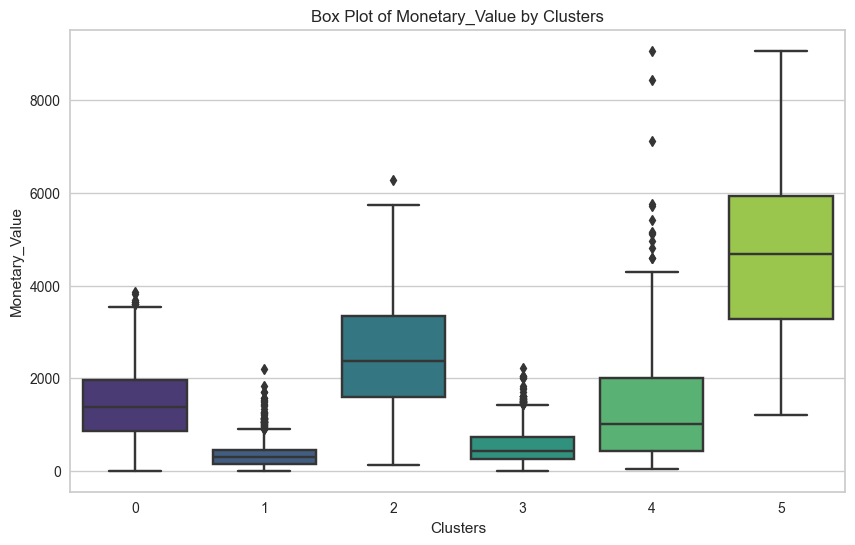

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



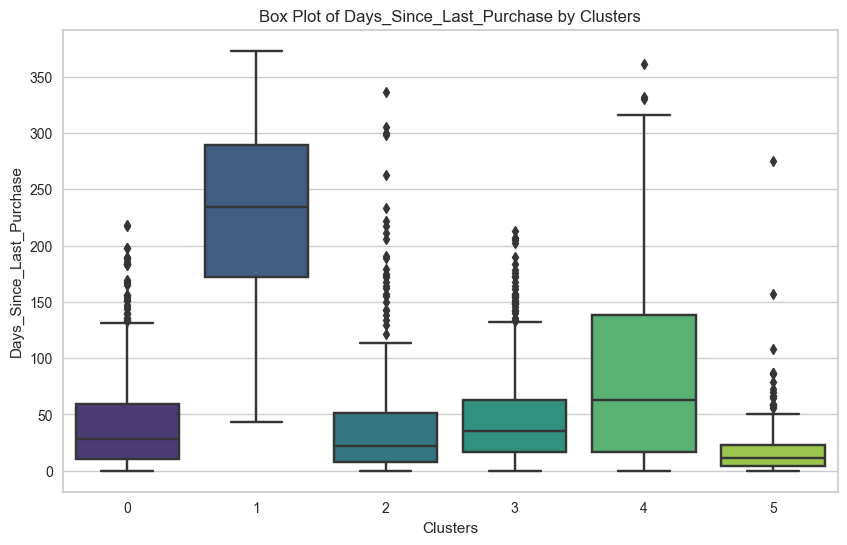

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features_to_plot = ['Monetary_Value', 'Frequency', 'Days_Since_Last_Purchase', 'Basket_Size', 'No_of_Returns']

# Create a separate box plot for each feature
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Clusters', y=feature, data=customer_data, palette='viridis')
    plt.title(f'Box Plot of {feature} by Clusters')
    plt.show()

In [40]:
customer_data_returns = customer_data.groupby('Clusters')['No_of_Returns'].sum().reset_index()

# Plotting a bargraph for Clusters vs No_of_Returns
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Clusters', y='No_of_Returns', data=customer_data_returns,palette='viridis')
plt.xlabel('Clusters')
plt.ylabel('No_of_Returns')
plt.title('Clusters vs No_of_Returns Bar Graph')
plt.show()

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

